In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('internship_Housing_Price_train.csv')
test = pd.read_csv('internship_HousingPrice_test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [5]:
train.shape

(1168, 81)

In [6]:
test.shape

(292, 80)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [9]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

# MISSING VALUES IN PERCENTAGE

In [11]:

missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
missing_values
MISSING_COLUMNS1 = list(missing_values.to_dict().keys())
missing_values_data = pd.DataFrame(missing_values)
missing_values_data.reset_index(level=0, inplace=True)
missing_values_data.columns = ['Feature','Number of Missing Values']
missing_values_data['Percentage of Missing Values'] = (100.0*missing_values_data['Number of Missing Values'])/len(train)
missing_values_data

,Feature,Number of Missing Values,Percentage of Missing Values
0,PoolQC,1161,99.400685
1,MiscFeature,1124,96.232877
2,Alley,1091,93.407534
3,Fence,931,79.708904
4,FireplaceQu,551,47.174658
5,LotFrontage,214,18.321918
6,GarageYrBlt,64,5.479452
7,GarageType,64,5.479452
8,GarageFinish,64,5.479452
9,GarageQual,64,5.479452


In [12]:
#missing columns in train data
MISSING_COLUMNS1

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType']

In [13]:
# missing values of test data
missing_values = test.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
missing_values
MISSING_COLUMNS2 = list(missing_values.to_dict().keys())

In [14]:
# missing columns in test data
MISSING_COLUMNS2

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtExposure',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

# check numeric features

In [15]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

# check categorical features

In [16]:
categorical_features = train.select_dtypes(exclude=[np.number])
categorical_features.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

# impute missing numerical features with 'NA' and categorical features with mean

In [17]:
for col in MISSING_COLUMNS1:
    data_type = train[col].dtype
    if data_type == 'object':
        train[col].fillna('NA',inplace=True)
    else:
        train[col].fillna(train[col].mean(),inplace=True)

In [18]:
for col in MISSING_COLUMNS2:
    data_type = test[col].dtype
    if data_type == 'object':
        test[col].fillna('NA',inplace=True)
    else:
        test[col].fillna(test[col].mean(),inplace=True)

In [19]:
# no null values after imputing
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# observe unique values

In [20]:
for i in train.columns:
    print(train[i].unique())

[127 889 793 ... 196  31 617]
[120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]
['RL' 'RM' 'FV' 'RH' 'C (all)']
[ 70.9884696  95.         92.        105.         58.         88.
  70.         80.         50.         44.        129.         59.
  55.         64.         24.         68.         71.         74.
  61.         60.        120.         84.        141.         30.
  65.         76.        100.         85.         75.        107.
 122.         82.         62.         73.         79.         77.
  41.         69.         90.         96.         72.         34.
  78.         63.         40.         98.        160.        108.
 128.         51.         81.         99.         66.         37.
 174.         87.         53.        152.         47.         86.
  56.         89.         35.         52.         21.        104.
  57.         83.         46.        101.        112.        149.
  93.         49.         43.        130.         54.         91.
  67.         97. 

# label encoding categorical features in train and test data

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
def feature_split(train):
    quant_ftr = []
    cat_ftr = []
    for feature in train.columns:
        if train[feature].dtype in ['float64', 'int64']:
            quant_ftr.append(feature)
        else:
            cat_ftr.append(feature)
    return quant_ftr,cat_ftr

In [23]:
def label_encode(train, ):
    quant_ftr, cat_ftr = feature_split(train)
    encoder = LabelEncoder()
    encoded = train[cat_ftr].fillna('NAN').apply(encoder.fit_transform)
    data = train[quant_ftr].join(encoded)
    return data

train_l = label_encode(train)
test_l = label_encode(test)

In [24]:
train_l.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,127,120,70.98847,4928,6,5,1976,1976,0.0,120,...,1,2,5,5,2,3,4,1,8,4
1,889,20,95.00000,15865,8,6,1970,1970,0.0,351,...,1,3,5,5,2,3,4,1,8,4
2,793,60,92.00000,9920,7,5,1996,1997,0.0,862,...,1,3,5,5,2,3,4,1,8,4
3,110,20,105.00000,11751,6,6,1977,1977,480.0,705,...,1,2,5,5,2,3,2,1,0,4
4,422,20,70.98847,16635,6,7,1977,2000,126.0,1246,...,1,0,5,5,2,3,4,1,8,4


In [25]:
test_l.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,337,20,86.000000,14157,9,5,2005,2006,200.0,1249,...,2,1,0,5,5,2,4,0,5,2
1,1018,120,66.425101,5814,8,5,1984,1984,0.0,1036,...,0,1,2,5,5,2,4,0,0,0
2,929,20,66.425101,11838,8,5,2001,2001,0.0,0,...,5,1,2,5,5,2,4,0,5,2
3,1148,70,75.000000,12000,7,7,1941,1950,0.0,275,...,2,1,3,5,5,2,4,0,5,2
4,1227,60,86.000000,14598,6,5,2007,2007,74.0,0,...,2,3,0,5,5,2,4,0,5,2


# checking outliers

In [26]:
Q1 = train_l.quantile(0.25)
Q3 = train_l.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                719.00
MSSubClass         50.00
LotFrontage        19.25
LotArea          3894.00
OverallQual         2.00
                  ...   
PoolQC              0.00
Fence               0.00
MiscFeature         0.00
SaleType            0.00
SaleCondition       0.00
Length: 81, dtype: float64


In [27]:

df = train_l[~((train_l < (Q1 - 1.5 * IQR)) |(train_l> (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
train_l.shape

(1168, 81)

In [29]:
df.shape

(85, 81)

In [30]:
#removing outliers leads to loss of data

# drop columns more than 80 percent of missing values and drop Id column

In [31]:

train_l.drop('PoolQC', axis=1, inplace=True)

In [32]:

train_l.drop('MiscFeature', axis=1, inplace=True)

In [33]:

train_l.drop('Alley',axis=1, inplace=True)

In [34]:

train_l.drop('Id', axis=1, inplace=True)

In [35]:

test_l.drop('PoolQC', axis=1, inplace=True)

In [36]:

test_l.drop('MiscFeature', axis=1, inplace=True)

In [37]:

test_l.drop('Alley',axis=1, inplace=True)

In [38]:

test_l.drop('Id', axis=1, inplace=True)

In [39]:
train_l.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,...,5.742295,3.092466,2.499144,1.886130,4.718322,4.764555,1.853596,3.475171,7.465753,3.768836
std,41.940650,22.437056,8957.442311,1.390153,1.124343,30.145255,20.785185,182.047152,462.664785,163.520016,...,0.987250,1.173111,1.935551,1.188295,0.896689,0.797518,0.501894,1.112090,1.619459,1.112208
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,6.000000,2.000000,1.000000,1.000000,5.000000,5.000000,2.000000,4.000000,8.000000,4.000000
50%,50.000000,70.988470,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,...,6.000000,3.000000,1.000000,2.000000,5.000000,5.000000,2.000000,4.000000,8.000000,4.000000
75%,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,...,6.000000,3.000000,5.000000,3.000000,5.000000,5.000000,2.000000,4.000000,8.000000,4.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,6.000000,5.000000,6.000000,3.000000,5.000000,5.000000,2.000000,4.000000,8.000000,5.000000


# histogram visualisation of all columns

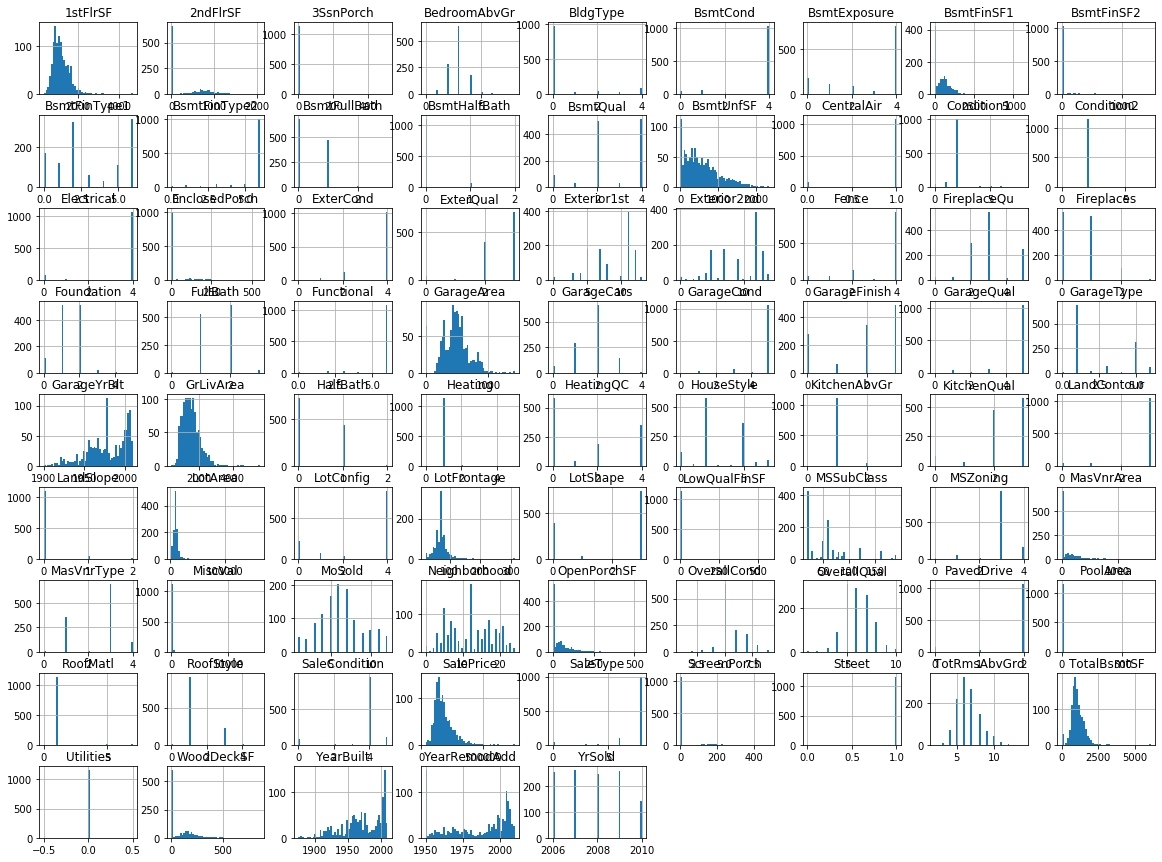

In [40]:
train_l.hist(bins=50, figsize=(20, 15))
plt.show()

In [41]:
#we observed above that data is not normally distributed

Skew is: 1.953877705368286


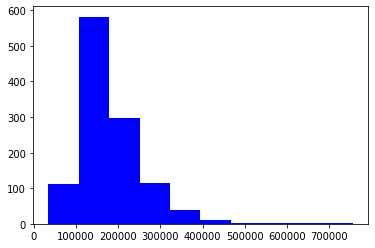

In [42]:
#checking distribuition of target
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

Skew is: 0.07359740998337982


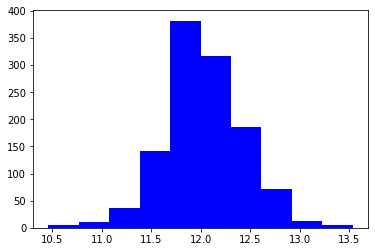

In [43]:
#normalized visualisation of target
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [44]:
#correlation of numeric features with target
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.789185
GrLivArea      0.707300
GarageCars     0.628329
GarageArea     0.619000
Name: SalePrice, dtype: float64 

YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64


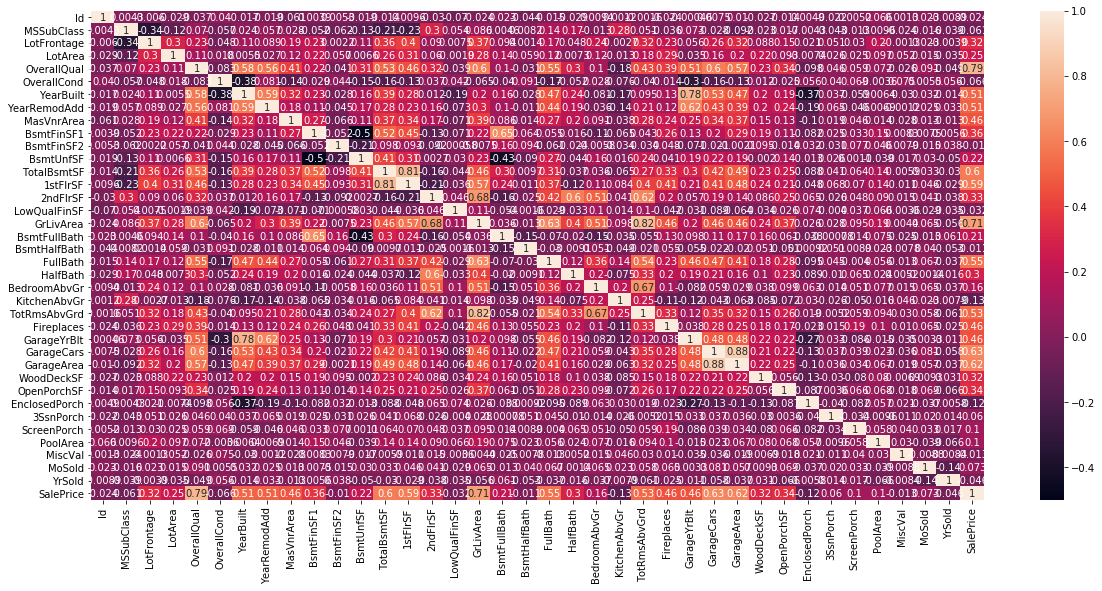

In [45]:
#Coralation plot
import seaborn as sns
corr = train.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

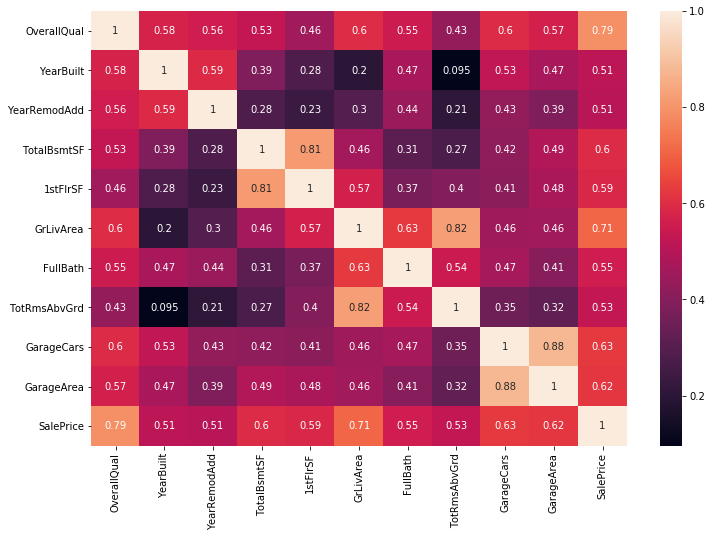

In [46]:
#correlation plot of top features
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

# 0verall quality table

In [47]:
train_l.OverallQual.unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10])

In [48]:

quality_pivot = train_l.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

In [49]:
quality_pivot

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108959.0
5,133700.0
6,160000.0
7,200120.5
8,268750.0
9,343821.5


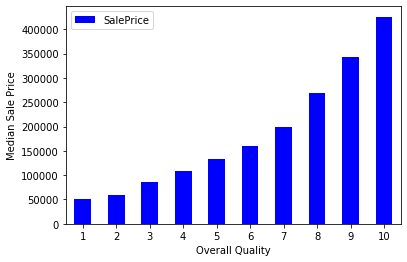

In [50]:
#visualisation of overall quality with sale price
import matplotlib.pyplot as plt
%matplotlib inline
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# from the above Notice that the median sales price strictly increases as Overall Quality increases

In [51]:
train_l.shape

(1168, 77)

In [52]:
test_l.shape

(292, 76)

In [53]:
#Separating Feature and Target matrices
import numpy as np
X = train_l.drop(['SalePrice'], axis=1)
y=train_l['SalePrice']

In [54]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [55]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [56]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [57]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [58]:
lr_accuracy=round(model.score(X_train,y_train)*100)
lr_accuracy

84.0

# from above  linear regression accuracy=84.0 percent

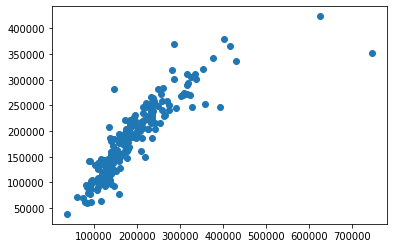

In [59]:
pred=model.predict(X_test)
plt.scatter(x=y_test,y=pred)


In [60]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
y_pred = model1.predict(X_test)
model1.score(X_train,y_train)

0.9761823802134187

#  from above random forest regressor accuracy is 97 percent

In [62]:
from sklearn import metrics
from sklearn.metrics import r2_score
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

0.8523205216006768

In [63]:

metrics.mean_squared_error(y_test, y_pred)

1050582665.9554892

In [64]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(model1,X_train,y_train,cv=10)
score,score.mean()

(array([0.87296496, 0.90447031, 0.7212594 , 0.90418788, 0.86520171,
        0.70014171, 0.87969759, 0.87145626, 0.85528398, 0.83032109]),
 0.8404984874722375)

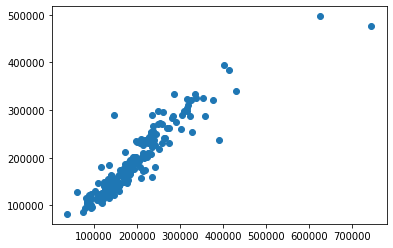

In [65]:
plt.scatter(x=y_test,y=y_pred)

In [66]:
# ridge regressor
from sklearn.linear_model import Ridge
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
Ridge(alpha=0.5)

Ridge(alpha=0.5)

In [67]:
y_pred = reg.predict(X_test)

In [68]:
reg.score(X_train,y_train)

0.8447253387534819

# from above ridge regressor accuracy is 84 percent

In [69]:
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

0.7636951564063338

In [70]:
metrics.mean_squared_error(y_test, y_pred)

1681058026.8271494

In [71]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(reg,X_train,y_train,cv=10)
score,score.mean()

(array([0.83464862, 0.84823044, 0.72937316, 0.88951126, 0.79430511,
        0.31570948, 0.87183216, 0.85801139, 0.81652179, 0.84054008]),
 0.7798683503845989)

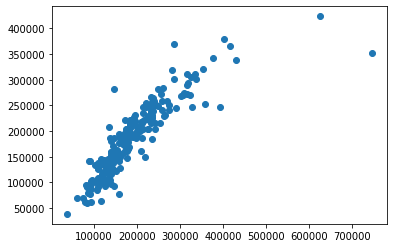

In [72]:
plt.scatter(x=y_test,y=y_pred)

In [73]:
# lasso
from sklearn.linear_model import Lasso
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
Lasso(alpha=0.1)

/home/sudhakar/enter/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3677330318.6972656, tolerance: 563196269.445362
  positive)


Lasso(alpha=0.1)

In [74]:
y_pred =clf.predict(X_test)

In [75]:
clf.score(X_train,y_train)

0.8447254637193643

# from above lasso score is 84 percent

In [76]:
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

0.7636340827678637

In [77]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(reg,X_train,y_train,cv=10)
score,score.mean()

(array([0.83464862, 0.84823044, 0.72937316, 0.88951126, 0.79430511,
        0.31570948, 0.87183216, 0.85801139, 0.81652179, 0.84054008]),
 0.7798683503845989)

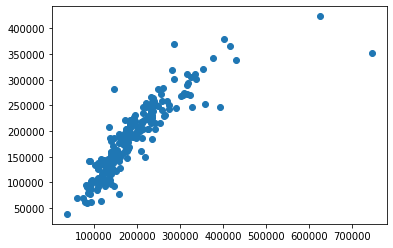

In [78]:
plt.scatter(x=y_test,y=y_pred)

In [79]:
#gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [80]:
y_pred = model.predict(X_test)

In [81]:
model.score(X_train,y_train)

0.9714078941418457

In [82]:
# from above gradientboost regressor accuracy is 97 percent

In [83]:
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

0.8555755150386237

In [84]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(reg,X_train,y_train,cv=10)
score,score.mean()

(array([0.83464862, 0.84823044, 0.72937316, 0.88951126, 0.79430511,
        0.31570948, 0.87183216, 0.85801139, 0.81652179, 0.84054008]),
 0.7798683503845989)

# # hyper parameter tuning random forest regressor

In [85]:

RFReg = RandomForestRegressor(n_estimators = 500, random_state = 1, n_jobs = -1) 

param_grid = { 
    'max_features' : ["auto", "sqrt", "log2"],
    'min_samples_split' : np.linspace(0.1, 1.0, 10),
     'max_depth' : [x for x in range(1,20)]}


from sklearn.model_selection import RandomizedSearchCV
CV_rfc = RandomizedSearchCV(estimator=RFReg, param_distributions =param_grid, n_jobs = -1, cv= 10, n_iter = 50)
CV_rfc.fit(X_train, y_train)


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_estimators=500, n_jobs=-1,
                                                   random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [86]:

CV_rfc.best_params_

{'min_samples_split': 0.1, 'max_features': 'sqrt', 'max_depth': 9}

In [87]:
CV_rfc.best_score_

0.7552426925081839

In [88]:
CV_rfc.score(X_train,y_train)

0.7693957831391395

In [89]:
from sklearn.ensemble import RandomForestRegressor
#1. Instantiate the estimator
RFReg = RandomForestRegressor(n_estimators = 500, random_state = 1, n_jobs = -1, min_samples_split = 0.1, max_features = 'sqrt', max_depth = 18) 
#2. Fit the model with data aka model training
RFReg.fit(X_train, y_train)

#3. Predict the response for a new observation
y_pred = RFReg.predict(X_test)


In [90]:
RFReg.score(X_train,y_train)

0.7693066233647203

In [91]:
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

0.6716957508645105

In [92]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFReg,X_train,y_train,cv=10)
score,score.mean()

(array([0.81945494, 0.7692599 , 0.60936899, 0.81772626, 0.79195294,
        0.71584007, 0.69795782, 0.80785575, 0.74944172, 0.77403071]),
 0.755288910190992)

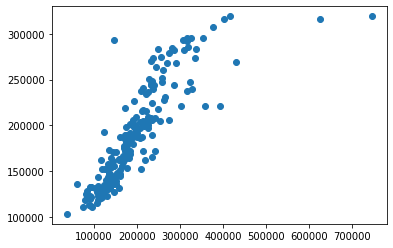

In [93]:
plt.scatter(x=y_test,y=y_pred)

In [94]:
#conclusion:random forest regressor with better model

# predicting test data

In [95]:
#predicting test dataset
lr_predict=RFReg.predict(test_l)
lr_predict

array([284401.91642784, 277002.37620572, 278090.01777168, 281316.51903828,
       286023.51920879, 247150.79435278, 281495.99254762, 283360.70123492,
       283186.97471697, 282974.07821836, 272270.90104176, 277968.91647454,
       274885.0044676 , 287205.65160961, 281424.72880161, 277523.39095329,
       248774.10305997, 276829.45309318, 286306.78995894, 281198.72875294,
       279944.77074322, 281255.90722389, 282842.79943123, 237426.8453928 ,
       274075.29242273, 277704.7547905 , 280090.47288171, 282673.17410467,
       288239.16015347, 271642.54130222, 269373.45231707, 282993.86662054,
       278256.43801614, 284182.82990537, 272123.99817264, 279706.45721405,
       287249.48111697, 286441.81915984, 282245.35172806, 281765.19732875,
       276829.45309318, 287118.02388261, 280321.68870249, 277382.21911053,
       276779.66110516, 279486.7215998 , 277360.4644359 , 271263.65434029,
       283468.00084131, 286132.34774366, 280603.64062307, 277094.18573958,
       277886.18647131, 2

# save model

In [96]:
from joblib import dump,load

In [97]:
dump(RFReg,'RandomForestRegressor.joblib')

['RandomForestRegressor.joblib']

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(train_l)